This notebook will have the code required to make some of the figures in the paper. 


In [1]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
import numpy as np 
import os
import sys 
sys.path.append('../../correct_call_annotations')
import correct_call_annotations 
from correct_call_annotations import correct_call_annotations
import pandas as pd
import scipy.io.wavfile as wavfile

In [2]:
%matplotlib notebook

## Figure illustrating the whole-audio analyses

The virtual multi bat files were generated by adding multiple single bat audio files. I also saved the original source audio files. Let's load the data and see which audio combinations looks nice. 

In [3]:
data_folder = '../../annotation_audio_analysis/'
audio_folder = os.path.join('../../','individual_call_analysis/','hp_annotation_audio/')
source_file = os.path.join(data_folder,'source_files_for_virtual_multibat_audio.csv')
source_audio = pd.read_csv(source_file)

In [4]:
def split_into_source_files(string_with_source):
    raw_filenames = string_with_source.split(',')
    # remove single apostrophes
    no_apostrophes = [each.replace("'","") for each in raw_filenames]
    # remove spaces
    no_spaces = [ each.replace(" ", "") for each in no_apostrophes]
    return no_spaces




In [5]:
source_audio_files = split_into_source_files(source_audio['source_single_bat_files'][20])

all_audio = []

for each in source_audio_files:
    matched_audio  = correct_call_annotations.find_file_in_folder(each,
                                                                  audio_folder)
    fs, audio = wavfile.read(matched_audio[0])
    all_audio.append(audio[:,0])



Match found!
Match found!


In [6]:
make_50ms_divs = lambda X,fs: np.arange(0,X.size, int(0.05*fs))

<IPython.core.display.Javascript object>


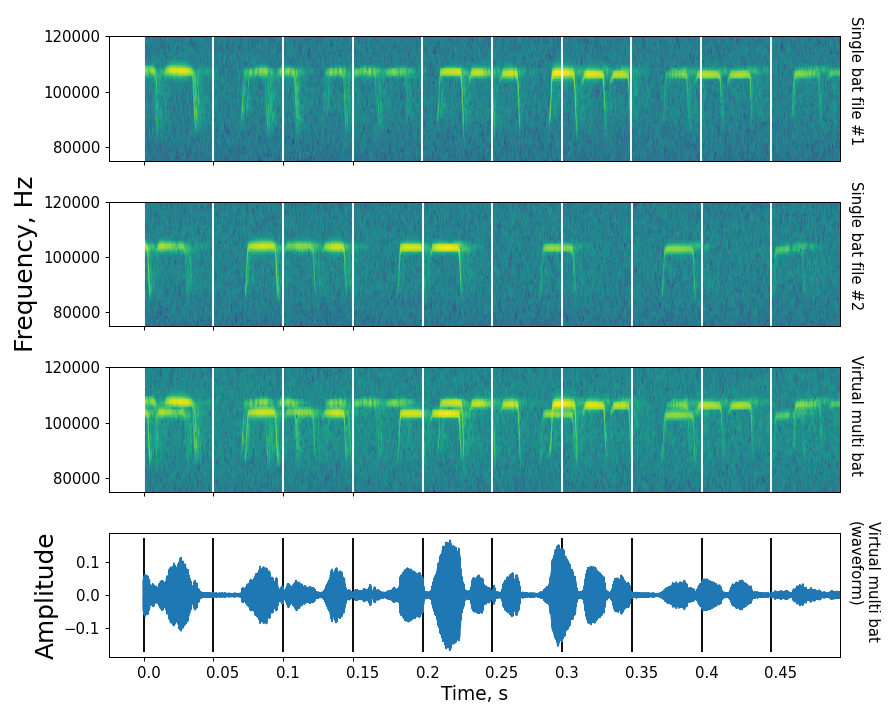

In [7]:
part_audio = [each[:int(0.5*fs)] for each in all_audio]
added_audio = part_audio[0] + part_audio[1]


plt.figure(figsize=(10,8))

a1 = plt.subplot(411)
plt.specgram(part_audio[0], Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(part_audio[0], fs)/fs, 0, fs*0.5,'w')
plt.ylim(75000,120000);
a1.set_xticklabels([])
plt.text(1.01,0.15,'Single bat file #1', rotation=270, fontsize=12, transform=plt.gca().transAxes)

a1.set_xticks(np.arange(0,0.55,0.05))
a1.tick_params(axis='both', which='major', labelsize=12)
plt.xlim(0,0.5)

a2 = plt.subplot(412, sharex=a1)
plt.specgram(part_audio[1], Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(part_audio[1], fs)/fs, 0, fs*0.5,'w')
plt.ylabel('Frequency, Hz', fontsize=20)
plt.ylim(75000,120000)
a2.set_xticklabels([])
plt.text(1.01,0.15,'Single bat file #2', rotation=270, fontsize=12, transform=plt.gca().transAxes)

a2.set_xticks(np.arange(0,0.55,0.05))
a2.tick_params(axis='both', which='major', labelsize=12)


a3=plt.subplot(413, sharex=a1)
plt.specgram(added_audio, Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(added_audio, fs)/fs, 0, fs*0.5,'w')
plt.text(1.01,0.15,'Virtual multi bat', rotation=270, fontsize=12, transform=plt.gca().transAxes)
plt.ylim(75000,120000);
a3.set_xticklabels([])

a3.tick_params(axis='both', which='major', labelsize=12)

a4=plt.subplot(414, sharex=a1)
t = np.linspace(0,added_audio.size/fs, added_audio.size)
normalised_added = added_audio/(-1+2**15)
plt.plot(t, normalised_added);
plt.text(1.01,0.15,'Virtual multi bat\n(waveform)', rotation=270, fontsize=12, transform=plt.gca().transAxes)

timepoints = make_50ms_divs(normalised_added, fs)/fs
plt.ylabel('Amplitude', fontsize=20)
plt.yticks(fontsize=12)
plt.vlines(make_50ms_divs(added_audio, fs)/fs, -0.17 ,.17,'k')
plt.xlabel('Time, s', fontsize=15, labelpad=15)
#lines = np.linspace(0,1,10)1
for each in timepoints:
    plt.text(each-0.005, -0.25,  str(each), fontsize=12)

plt.tight_layout()

plt.savefig('virtual_multibat_schematic.png')

## Making composite graph --
HRG suggested we make a composite graph showing the itsFM example segmentation, along with single and multi bat audio - as seen in the sketch. Here's my attemp at making it.

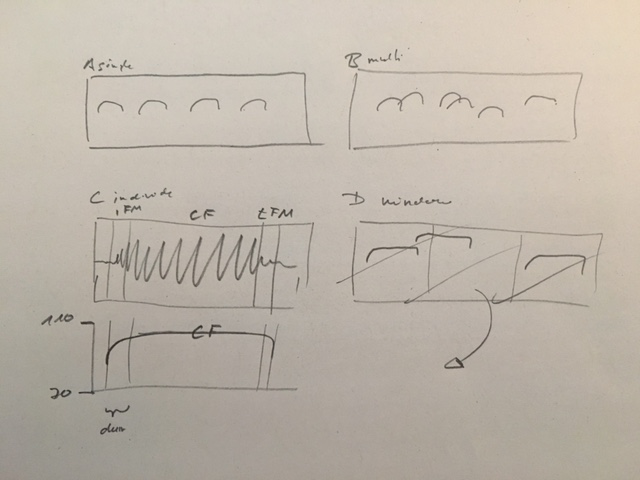

In [10]:
# example taken from https://itsfm.readthedocs.io/en/latest/gallery_dir/plot_0_segmenting_real_sounds.html
import itsfm
from itsfm.data import example_calls, all_wav_files

In [12]:
bat_rec = list(map( lambda X: '2018-08-17_34_134' in X, all_wav_files))
index = bat_rec.index(True)
audio, fs = example_calls[index] # load the relevant example audio

non_default_parameters = {
                          'segment_method':'pwvd',
                          'signal_level':-26, # dBrms re 1
                          'fmrate_threshold':2.0, # kHz/ms
                          'max_acc':2.0, # kHz/ms^2
                          'window_size':int(fs*0.0015) # number of samples
                          }
outputs = itsfm.segment_and_measure_call(audio, fs,
                                        **non_default_parameters)


In [42]:
# load a multi-bat audio which looks 'nice'

In [65]:
annots = pd.read_csv('../../annotation_audio_analysis/verified_annotations.csv')
multi_batannots = annots[annots['num_bats']>1]['valid_annotations'][9]



In [66]:
multi_batannots

'matching_annotaudio_Aditya_2018-08-16_21502300_36'

In [68]:
multi_batannots+'_hp.WAV'

'matching_annotaudio_Aditya_2018-08-16_21502300_36_hp.WAV'

In [72]:
multibat_audio  = correct_call_annotations.find_file_in_folder(multi_batannots+'_hp.WAV',
                                                                  audio_folder)
fs, mbat_audio = wavfile.read(multibat_audio[0])
mbat_clip = mbat_audio[-int(0.15*fs):,0]


Match found!


In [36]:
part_partaudio0 = part_audio[0][:int(fs*0.15)]

<IPython.core.display.Javascript object>


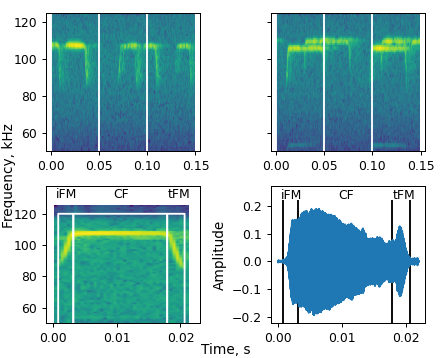

In [215]:
plt.figure(figsize=(5,4))
a = plt.subplot(111)
a01 = plt.subplot(221)
plt.specgram(part_partaudio0, Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(part_partaudio0, fs)/fs, 0, fs*0.5,'w')
plt.ylim(50000,125000);
#a00.set_xticklabels([])
a01.set_xticks(np.arange(0,0.2,0.05))
a01.set_yticks(np.arange(60,130,20)*10**3)
a01.tick_params(axis='both', which='major', labelsize=10);
a01.set_yticklabels(np.arange(60,130,20))

plt.xlim(-0.005,0.155)

a11 = plt.subplot(222)
plt.specgram(mbat_clip, Fs=fs, vmin=-60);
plt.vlines(make_50ms_divs(mbat_clip, fs)/fs, 0, fs*0.5,'w')
plt.ylim(50000,125000);
a11.set_xticks(np.arange(0,0.2,0.05))
a11.set_yticks(np.arange(60,130,20)*10**3);a11.set_yticklabels([])
a11.tick_params(axis='both', which='major', labelsize=10)
plt.xlim(-0.005,0.155)


# customise the segmentation output from itsfm 
seg_out, _, msmts = outputs

a00 = plt.subplot(224)
line_max = np.max(abs(audio))*1.15
t = np.linspace(0,audio.size/fs,audio.size)
plt.plot(t, audio)
plt.vlines([msmts['start'][0],msmts['stop'][0],msmts['stop'][1],msmts['stop'][2]],line_max,-1*line_max,
          'k')
a00.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Amplitude', fontsize=11)
plt.text(0.00051,line_max+0.001,'iFM',  fontsize=10)
plt.text(0.0095,line_max+0.001,'CF',  fontsize=10)
plt.text(0.018,line_max+0.001,'tFM',  fontsize=10)
plt.ylim(-1*line_max, line_max+0.05)
#plt.text(1.01,0.15,'Virtual multi bat\n(waveform)', rotation=270, fontsize=12, transform=plt.gca().transAxes)
#plt.text(-0.1,1.2,'Frequency, kHz', fontsize=12, rotation=90, transform=a00.transAxes)



a10 = plt.subplot(223)
plt.specgram(audio, Fs=fs);plt.ylim(50000,138000);
plt.text(0.00051,130*10**3,'iFM',  fontsize=10)
plt.text(0.0095,130*10**3,'CF',  fontsize=10)
plt.text(0.018,130*10**3,'tFM',  fontsize=10)
plt.plot(t,seg_out[0]*120000,'w')
plt.plot(t,seg_out[1]*120000,'w')
a10.set_yticks(np.arange(60,130,20)*10**3);a10.set_yticklabels(np.arange(60,130,20))
a10.tick_params(axis='both', which='major', labelsize=10)

#0.0000025
plt.figtext(0.00511, 0.37, 'Frequency, kHz', fontsize=11, rotation=90)
plt.figtext(0.45, 0.01, 'Time, s', fontsize=11)

plt.tight_layout()
plt.savefig('fig1_composite.png')



In [131]:
msmts

,start,stop,duration,region_id
0,0.000840,0.003208,0.002368,fm1
1,0.003208,0.017908,0.014700,cf1
2,0.017908,0.020640,0.002732,fm2


In [98]:
seg_out[0].shape

(5500,)